# How does cooking change the antioxidant activity of different vegetables? 

This question was answered in a paper(1) that measured the antioxidant activity of 20 different vegetables with 6 cooking methods. The authors used three different assays to measure antioxidant activity. In the paper, the results are only available in tabular format. Here, I'm visualizing the results for a faster grasp of the results. 

(1) A M Jiménez-Monreal, L García-Diz, M Martínez-Tomé, M Mariscal, M A Murcia. Influence of Cooking Methods on Antioxidant Activity of Vegetables. J Food Sci, 2009. https://doi.org/10.1111/j.1750-3841.2009.01091.x


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# extracted the table data from the PDF with Tabula 
# https://tabula.technology/

# read the data with pandas
dfLOO = pd.read_csv('cooking_veg_LOO.csv')
dfOH = pd.read_csv('cooking_veg_OH.csv')
dfABTS = pd.read_csv('cooking_veg_ABTS.csv')

In [3]:
# correct column naming errors in the table conversion
dfABTS.rename(columns = {'Boiling Pressure-cooking': 'Boiling', 'Unnamed: 2': 'Pressure-cooking'}, inplace  = True)

In [4]:
# define functions for data cleaning 

def extract_mean(data):
    """ 
    Extract all numbers and signs preceeding the ± sign. 
    Input: a string, one entry in the data frame. 
    Returns: mean value as a float, 0 if not significant result. 
    """
    try:
        output = float(data.split()[0])
    except ValueError:
        try:
            output = float(data.split()[0][1:])
            output = -output 
        except ValueError:
            output = 0
            
    output = -output
    return output

In [5]:
methods = dfLOO.columns[1:] # names of all cooking methods
tables = [dfLOO, dfOH, dfABTS] # list of the three tables

In [6]:
# Cleaning the data: 
## extract the mean values from the text in each table
## replacing the non-significant values with 0 loss 
## and changing the sign of the losses, such that a positive number means antioxidant activity gain, and a negative number means loss
for table in tables:
    for method in methods:
        table[method] = table[method].apply(extract_mean)
    table.set_index('Vegetables', inplace = True) #change the index to the vegetable names

In [7]:
# resulting cleaned data frame with mean values
dfLOO

,Boiling,Pressure-cooking,Baking,Microwaving,Griddling,Frying
Vegetables,,,,,,
Artichoke,0.0,0.0,0.0,0.0,0.0,0.0
Asparagus,6.7,0.0,0.0,0.0,7.0,-6.5
Beetroot,-5.0,0.0,-19.6,-22.0,0.0,-21.4
Broad bean,-9.7,-6.8,-10.5,-10.4,-8.0,-11.8
Broccoli,-32.7,-37.4,0.0,-34.2,6.5,-15.6
Brussels sprout,-33.0,-38.9,-31.8,-40.3,-35.1,-42.4
Cauliflower,-55.0,-36.7,-36.4,-56.7,-11.8,-23.9
Carrot,-33.9,-43.7,-31.7,-42.2,-13.7,-11.1
Celery,-21.2,-34.3,-11.2,-30.7,0.0,-18.9


In [8]:
# concatenate all data frames and calculate the mean over the 3 antioxidant-activity assays
df = pd.concat([dfLOO, dfOH, dfABTS])
dfmean = df.groupby(df.index).mean()

In [9]:
titles = ['LOO radicals assay', 'OH radicals assay', 'ABTS radicals assay', 'Mean']

In [10]:
tables.append(dfmean) #add the means dataframe to the list of tables 

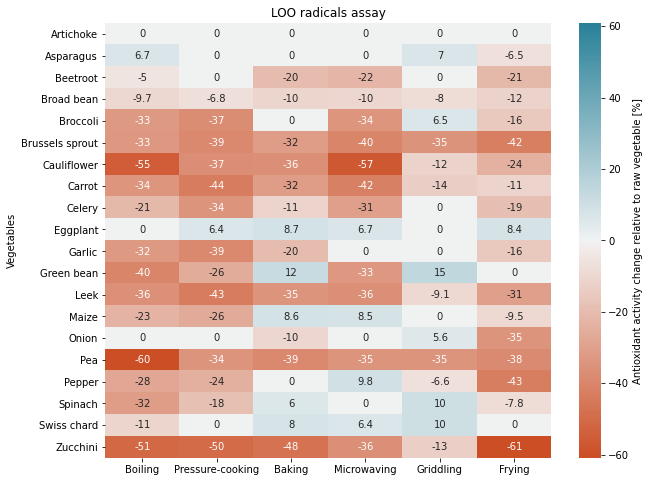

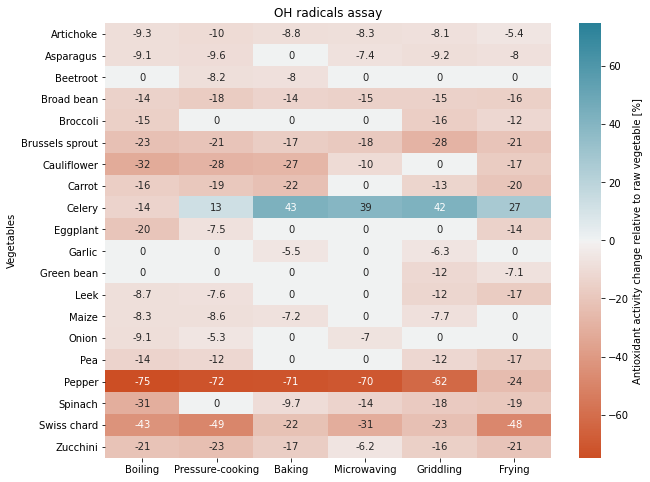

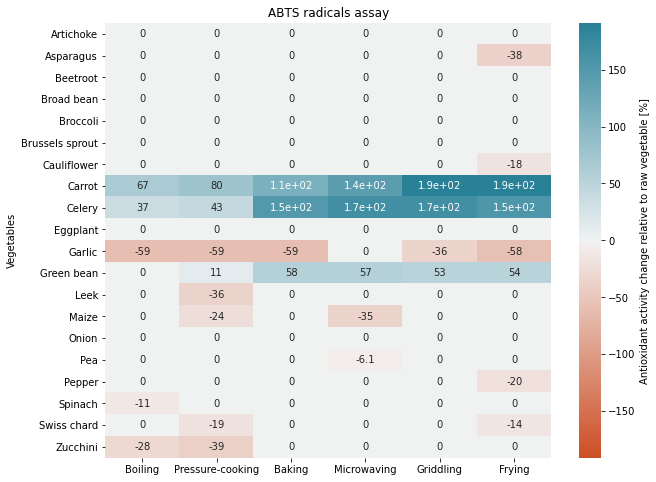

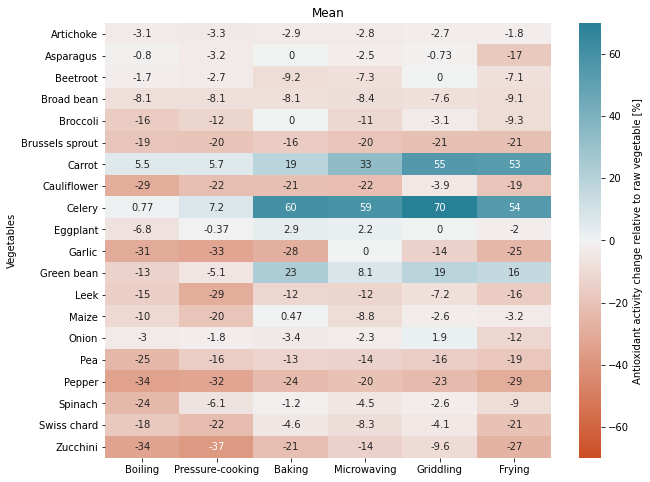

In [20]:
# visualize the antioxidant loss for the three assays and the mean 
c = -1
cbar_kws = {'label': 'Antioxidant activity change relative to raw vegetable [%]'}
for table in tables:
    c +=1
    maxval = max([abs(max(table.max())), abs(min(table.min()))])
    plt.figure(figsize = (10,8))
    plt.title(titles[c])
    sns.heatmap(table, cmap = sns.diverging_palette(20, 220, s= 89, as_cmap=True), vmin = -maxval, vmax = maxval, annot = True, cbar_kws = cbar_kws)

In [257]:
# sort the dataframes and visualize as size grid

In [223]:
# sorting by mean over cooking methods
dfmean['mean'] = dfmean.mean(axis = 1)
dfmean_sorted = dfmean.sort_values('mean')

In [258]:
# create x and y coordinates with meshgrid
x = np.arange(dfmean_sorted.shape[0])
y = np.arange(dfmean_sorted.shape[1])
xx, yy = np.meshgrid(x,y)

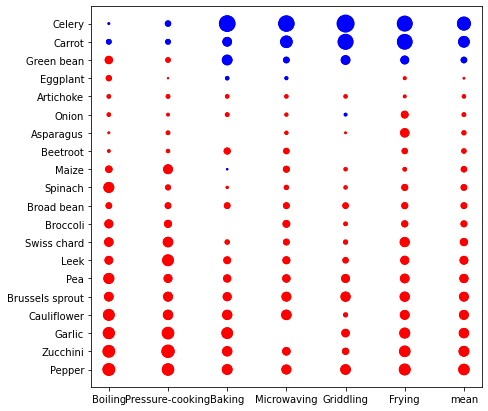

In [226]:
# make scatterplot
plt.figure(figsize = (7,7))
plt.scatter(yy,xx, s = dfmean_sorted.T*4, color = 'b')
plt.scatter(yy,xx, s = -dfmean_sorted.T*4, color = 'r')
plt.xticks(y, dfmean_sorted.columns);
plt.yticks(x, dfmean_sorted.index);

plt.scatter(yy,xx, s = dfmean_sorted.T*4, color = 'b')
plt.scatter(yy,xx, s = -dfmean_sorted.T*4, color = 'r')

In [260]:
# create a more intuitively readable plot with the antioxidant activity change on the xaxis 

In [227]:
# drop the mean column 
mean = dfmean_sorted['mean']
dfmean_sorted.drop(['mean'], axis = 1, inplace = True)

In [228]:
# get lists of the best method for each veg, as well as the corresponding values
best_method = dfmean_sorted.idxmax(axis = 1)
best_method_value = dfmean_sorted.max(axis = 1)
best_method[best_method_value <= 0] = 'Raw'
best_method_value[best_method_value <= 0] = 0

best_method_index = dfmean_sorted.values.argmax(axis = 1)
best_method_index[best_method_value <= 0] = 6

In [229]:
# create cooking methods color palettes
cmap = sns.husl_palette(6)
cmap_raw = sns.husl_palette(6)
cmap_raw.append((0,0,0))
cmap_raw

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225),
 (0, 0, 0)]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(80, 20, 'Best method')

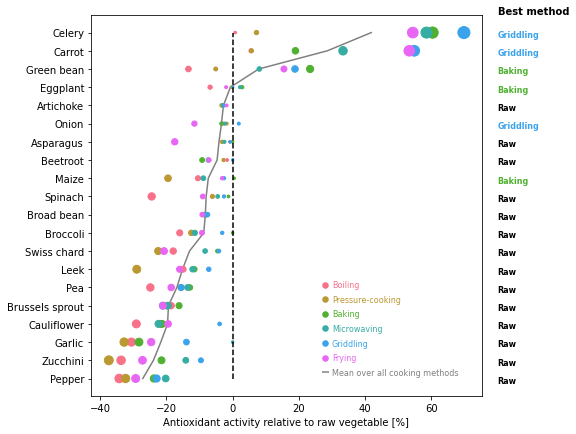

In [256]:
plt.figure(figsize = (7,7))

# plot grey mean line 
plt.plot(mean, np.arange(0,20), color = 'grey', zorder = 0)

for i in range(dfmean_sorted.shape[0]): # loop over veggies
    # scatter plot first the positive values, then the negative, colored by cooking method, sized by absolute value 
    plt.scatter(x = dfmean_sorted.iloc[i], y = np.zeros(dfmean_sorted.shape[1])+i, s = 5 + dfmean_sorted.iloc[i]*2, color = cmap)
    plt.scatter(x = dfmean_sorted.iloc[i], y = np.zeros(dfmean_sorted.shape[1])+i, s = -dfmean_sorted.iloc[i]*2 + 5, color = cmap)
    # add text with best method
    plt.text(80,i-0.25, best_method[i], fontsize = 8, color = cmap_raw[best_method_index[i]], weight = 'bold')

plt.yticks(x, dfmean_sorted.index); # add y ticklabels (vegetables)
plt.vlines(0,0,19, linestyle = '--', color = 'k') # add 0 line for raw veggies 
plt.xlabel('Antioxidant activity relative to raw vegetable [%]'); 

## plot legend 
setx = 30 #setpoint for legend location in x 
for j in range(6): # loop over cooking methods
    plt.text(setx,5-j*0.8,dfmean_sorted.columns[j], fontsize = 8, color = cmap[j])
    plt.scatter(setx-2,5-j*0.8+0.15, s = 30, color = cmap[j])
# add legend for grey  mean line 
plt.text(setx,0.2,'Mean over all cooking methods', fontsize = 8, color = 'grey') 
plt.hlines(0.35,setx-3,setx-1, color = 'grey')

# add title for best method column 
plt.text(80,20, 'Best method', fontsize = 10, color = 'k', weight = 'bold')
